<a href="https://colab.research.google.com/github/geetha2612/deep__learning/blob/main/DL_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

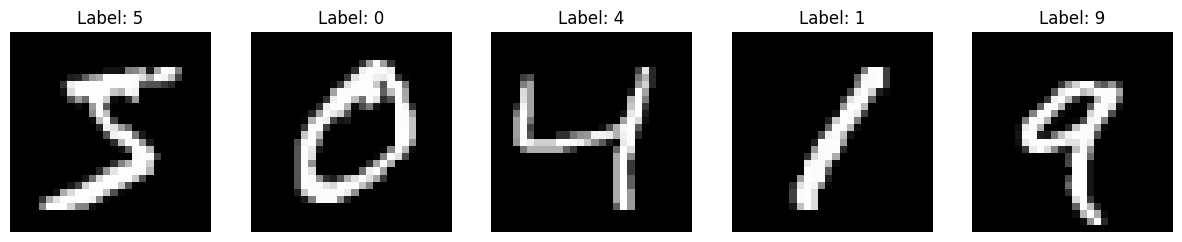

In [ ]:
import matplotlib.pyplot as plt

# Visualize some of the train images
num_samples_to_visualize = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 55s 64ms/step - loss: 0.2534 - accuracy: 0.9224 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 2/15
844/844 [==============================] - 54s 64ms/step - loss: 0.0903 - accuracy: 0.9735 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 3/15
844/844 [==============================] - 55s 65ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 4/15
844/844 [==============================] - 55s 65ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 5/15
844/844 [==============================] - 53s 63ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0360 - val_accuracy: 0.9905
Epoch 6/15
844/844 [==============================] - 54s 64ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0399 - val_accuracy: 0.9912
Epoch 7/15
844/844 [==============================] - 53s 63ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0304 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 5s 17ms/step - loss: 0.0270 - accuracy: 0.9924
Test accuracy: 0.9923999905586243


1/1 [==============================] - 0s 157ms/step


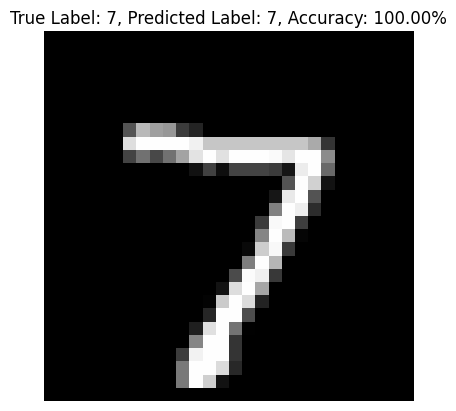

In [ ]:
# Choose an index from the test set
import matplotlib.pyplot as plt

index = 0

# Get the image and its label
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Calculate accuracy for this individual image
accuracy = 100 * (predicted_label == true_label)

# Display the test image
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}, Accuracy: {accuracy:.2f}%")
plt.axis('off')
plt.show()
